#### **Decision Tree Regression**


**Import Necessary Libraries**


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

**Load and Explore the Dataset**


In [17]:
data = pd.read_csv("Size_And_Bedrooms_Vs_Price.csv")

In [18]:
data.sample(5)

,Size,Bedrooms,Price
1,1600,3,329900
38,4215,4,549000
37,2132,4,345000
43,1200,3,299000
16,1320,2,299900


In [19]:
data.shape

(47, 3)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Size      47 non-null     int64
 1   Bedrooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
Bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
Price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


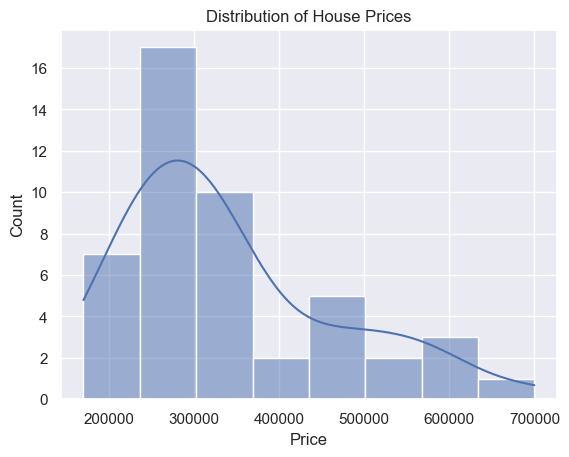

In [22]:
sns.histplot(data=data, x="Price", kde=True)
plt.title("Distribution of House Prices")
plt.show()

**Separate features (X) and target variable (y)**


In [23]:
X = data.drop("Price", axis=1).values
y = data["Price"].values.reshape(-1, 1)

**Feature Scaling**


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

**Train Decision Tree Regressor Model**


In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
decision_tree_reg = DecisionTreeRegressor(max_depth=3)
decision_tree_reg.fit(X_scaled, y_scaled)

DecisionTreeRegressor(max_depth=3)

**Evaluate the Best Model**


In [28]:
y_pred_scaled = decision_tree_reg.predict(X_scaled).reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred_scaled)

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y, y_pred)

0.8239943024803538